## Importing libraries

In [9]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [3]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.1 * np.random.randn(80)

In [4]:
# Define the kernel (RBF kernel with constant amplitude)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

In [5]:
# Create a Gaussian Process Regressor with the defined kernel
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

In [6]:
# Fit the Gaussian Process model to the data
gpr.fit(X, y)

/Users/abhishekde/Desktop/Projects/.venv/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [7]:
# Make predictions on a test set
X_test = np.linspace(0, 5, 1000)[:, np.newaxis]
y_pred, sigma = gpr.predict(X_test, return_std=True)

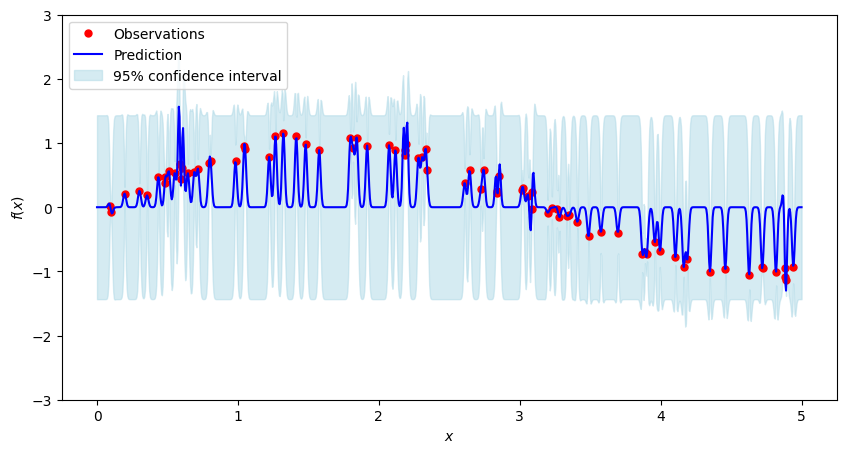

In [8]:
# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_test, y_pred, 'b-', label='Prediction')
plt.fill_between(X_test[:, 0], y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, color='lightblue', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-3, 3)
plt.legend(loc='upper left')
plt.show()

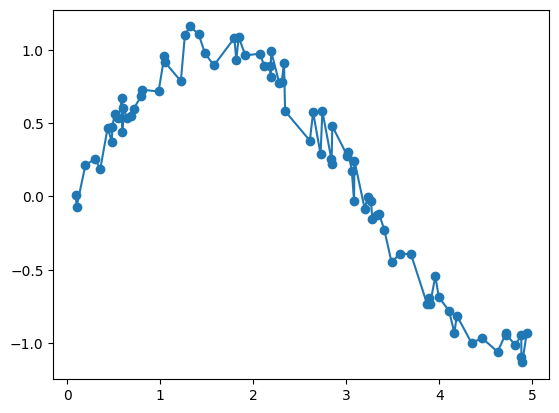

In [12]:
plt.plot(X,y, "-o")